In [10]:
# installing the required packages
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap
import umap.umap_ as umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


              precision    recall  f1-score   support

           0       0.44      0.69      0.54      1343
           1       0.69      0.87      0.77      1600
           2       0.18      0.31      0.22      1380
           3       0.13      0.18      0.16      1433
           4       0.14      0.16      0.15      1295
           5       0.21      0.16      0.18      1273
           6       0.19      0.10      0.13      1396
           7       0.44      0.30      0.36      1503
           8       0.25      0.11      0.15      1357
           9       0.26      0.13      0.17      1420

    accuracy                           0.31     14000
   macro avg       0.29      0.30      0.28     14000
weighted avg       0.30      0.31      0.29     14000



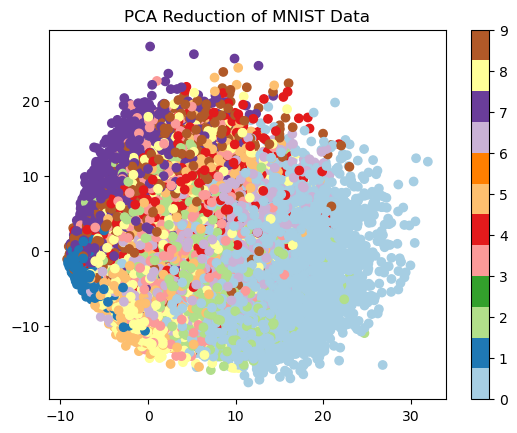

In [4]:
# Loading MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Normalizing the data set
X = X / 255.0

# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# K-Nearest Neighbors classifier for PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Evaluating the model for PCA
y_pred = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred))

# Assuming y_train is of pandas Categorical type or string type
y_train_num = y_train.astype('category').cat.codes

# Visualizing the resulting two-dimensional data for PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_num, cmap="Paired")
plt.colorbar()
plt.title('PCA Reduction of MNIST Data')
plt.show()

Based on the output, the model seems to be performing relatively poorly, as the overall accuracy is 0.31 (31%), meaning it only correctly predicted the class of the digit 31% of the time. The F1-score, which is a better metric to look at when dealing with imbalanced classes, is also quite low, indicating that the model isn't performing well.

The model appears to perform best on classes 0 and 1 with the highest F1-scores, but poorly on the other classes, especially classes 3, 4, 6, 8, and 9.

It's important to note that I've reduced the dimensionality of my data to just two dimensions using PCA. MNIST is a relatively complex dataset, and reducing it to just two dimensions may have lost too much information, leading to my model's poor performance.


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1343
           1       0.96      0.99      0.97      1600
           2       0.93      0.94      0.93      1380
           3       0.92      0.93      0.93      1433
           4       0.92      0.93      0.93      1295
           5       0.92      0.91      0.91      1273
           6       0.96      0.96      0.96      1396
           7       0.93      0.92      0.93      1503
           8       0.94      0.89      0.92      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



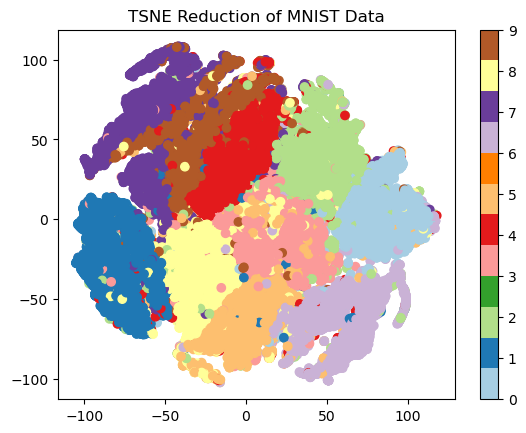

In [5]:
# concatenating on train and test data
X_full = np.concatenate((X_train, X_test), axis=0)

# Applying TSNE
tsne = TSNE(n_components=2, random_state=42)
X_full_tsne = tsne.fit_transform(X_full)

# splitting the data back into train and test
X_train_tsne, X_test_tsne = X_full_tsne[:len(X_train)], X_full_tsne[len(X_train):]

# K-Nearest Neighbors classifier for TSNE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tsne, y_train)

# Evaluating the model for TSNE
y_pred = knn.predict(X_test_tsne)
print(classification_report(y_test, y_pred))

# Visualizing the resulting two-dimensional data for TSNE
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_num, cmap="Paired")
plt.colorbar()
plt.title('TSNE Reduction of MNIST Data')
plt.show()

Based on the output, the KNN model with the t-SNE transformed data performs significantly better than the previous PCA approach. The overall accuracy is 0.93 (93%), which means the model correctly predicted the digit class 93% of the time. This is a substantial improvement over the 31% accuracy achieved with PCA.

The F1-scores are also high, hovering around 0.93 on average, which indicates that the model has balanced precision and recall for each class. This can be seen in the individual class breakdown, where each class has a high F1-score, indicating that the model is performing well on each individual class. The precision, recall, and F1-score are all quite high, suggesting that the model is doing a good job of correctly identifying the digit classes and making few false positive or false negative predictions.

This shows the power of t-SNE in preserving the local and global structure of the data, leading to improved classification performance. The scatter plot generated by the t-SNE reduction would also give a clear visual of how the data points of different classes are segregated in the 2-dimensional space.

However, it's important to note that while t-SNE can be a powerful tool, it is also more computationally intensive than PCA, so it may not always be the best choice depending on your dataset and computational resources.

In conclusion, the results indicate that your K-Nearest Neighbors model, in conjunction with t-SNE for dimensionality reduction, is performing very well on the MNIST dataset.


              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1343
           1       0.83      0.94      0.88      1600
           2       0.32      0.49      0.39      1380
           3       0.27      0.30      0.28      1433
           4       0.41      0.55      0.47      1295
           5       0.42      0.35      0.38      1273
           6       0.54      0.41      0.47      1396
           7       0.57      0.50      0.53      1503
           8       0.27      0.16      0.20      1357
           9       0.42      0.32      0.36      1420

    accuracy                           0.49     14000
   macro avg       0.48      0.48      0.48     14000
weighted avg       0.49      0.49      0.48     14000



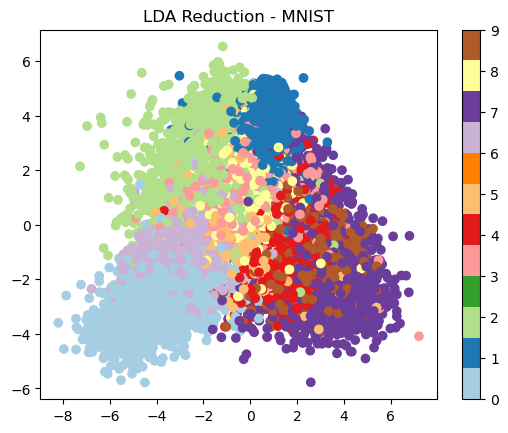

In [6]:
# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train and evaluate a KNN classifier
knn_lda = KNeighborsClassifier(n_neighbors=3)
knn_lda.fit(X_train_lda, y_train)

y_pred_lda = knn_lda.predict(X_test_lda)
print(classification_report(y_test, y_pred_lda))

# Visualizing the resulting two-dimensional data
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train.astype('category').cat.codes, cmap="Paired")
plt.colorbar()
plt.title('LDA Reduction - MNIST')
plt.show()

Based on the output, the KNN model with LDA transformed data performs moderately well, with an overall accuracy of 0.49 (49%). This is a substantial improvement over the 31% accuracy achieved with PCA, but still lower than the 93% accuracy achieved with t-SNE.

The F1-scores indicate that the model has balanced precision and recall relatively well for most of the classes. The model performs best on classes 0 and 1 with the highest F1-scores, but performance is less satisfactory for the remaining classes, particularly classes 2, 3, 8, and 9 which have low F1-scores.

This suggests that the LDA transformation and the KNN model combination is not able to distinguish these classes as effectively, leading to a larger number of misclassifications and thus lower performance metrics.


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1343
           1       0.92      0.99      0.95      1600
           2       0.91      0.89      0.90      1380
           3       0.87      0.90      0.88      1433
           4       0.88      0.87      0.88      1295
           5       0.86      0.84      0.85      1273
           6       0.95      0.94      0.95      1396
           7       0.88      0.87      0.87      1503
           8       0.92      0.83      0.87      1357
           9       0.82      0.83      0.82      1420

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



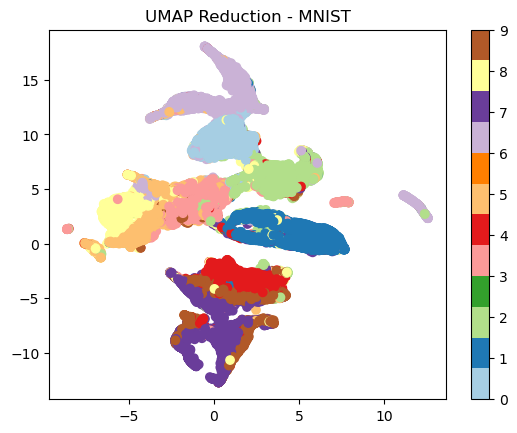

In [11]:
# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_train_umap = reducer.fit_transform(X_train)
X_test_umap = reducer.transform(X_test)

# Train and evaluate a KNN classifier
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_train_umap, y_train)

y_pred_umap = knn_umap.predict(X_test_umap)
print(classification_report(y_test, y_pred_umap))

# Visualizing the resulting two-dimensional data
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train.astype('category').cat.codes, cmap="Paired")
plt.colorbar()
plt.title('UMAP Reduction - MNIST')
plt.show()

From this report, we can infer that your model has overall good performance, with accuracy, macro avg, and weighted avg all being 0.89. Some classes have better precision and recall than others, such as class 0, which has high precision and recall. Other classes like class 9 have lower precision and recall. If you want to further improve your model, you might need to look into the classes that are performing poorly.

In [12]:
# Initialize the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the PCA-transformed training data
rf.fit(X_train_pca, y_train)

# Predict the classes of the test set
y_pred_pca = rf.predict(X_test_pca)

# Compute accuracy of the PCA-transformed dataset
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy with PCA: {accuracy_pca}')

# Fit the classifier on the LDA-transformed training data
rf.fit(X_train_lda, y_train)

# Predict the classes of the test set
y_pred_lda = rf.predict(X_test_lda)

# Compute accuracy of the LDA-transformed dataset
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy with LDA: {accuracy_lda}')

# Fit the classifier on the t-SNE-transformed training data
rf.fit(X_train_tsne, y_train)

# Predict the classes of the test set
y_pred_tsne = rf.predict(X_test_tsne)

# Compute accuracy of the t-SNE-transformed dataset
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
print(f'Accuracy with t-SNE: {accuracy_tsne}')

# Fit the classifier on the UMAP-transformed training data
rf.fit(X_train_umap, y_train)

# Predict the classes of the test set
y_pred_umap = rf.predict(X_test_umap)
print(y_pred_umap)

# Compute accuracy of the UMAP-transformed dataset
accuracy_umap = accuracy_score(y_test, y_pred_umap)
print(f'Accuracy with UMAP: {accuracy_umap}')

Accuracy with PCA: 0.3227857142857143
Accuracy with LDA: 0.5135714285714286
Accuracy with t-SNE: 0.9383571428571429
['8' '4' '5' ... '2' '4' '1']
Accuracy with UMAP: 0.8988571428571429


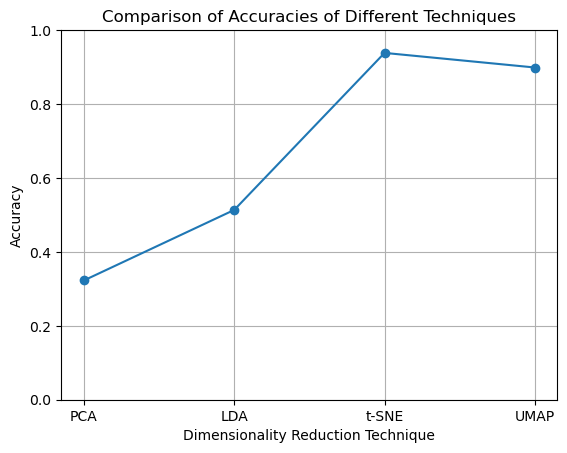

In [15]:
import matplotlib.pyplot as plt

# List of accuracies
accuracies = [accuracy_pca, accuracy_lda, accuracy_tsne, accuracy_umap]

# Corresponding dimension reduction techniques
techniques = ['PCA', 'LDA', 't-SNE', 'UMAP']

# Create a line plot
plt.plot(techniques, accuracies, marker='o')

plt.xlabel('Dimensionality Reduction Technique')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies of Different Techniques')

plt.ylim([0, 1])  # Set y-axis limits between 0 and 1

plt.grid(True)  # Add grid for better visibility of values
plt.show()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


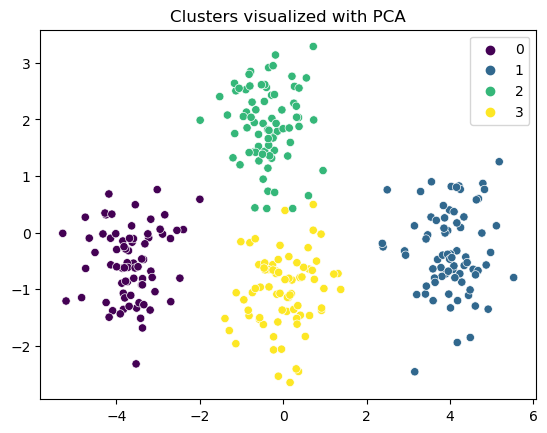

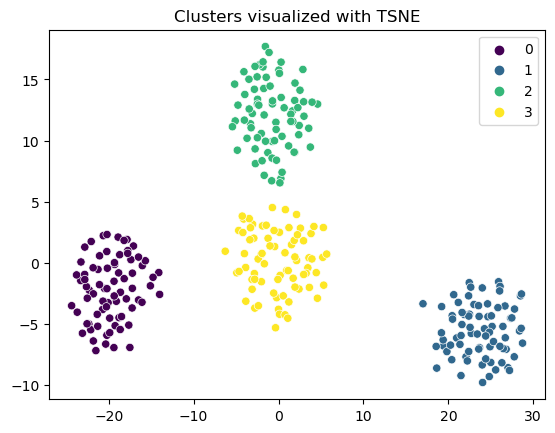

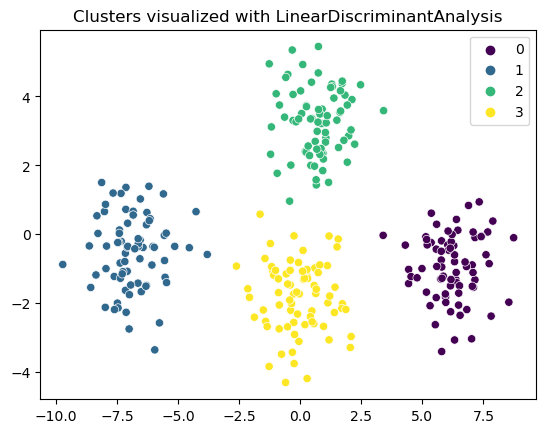

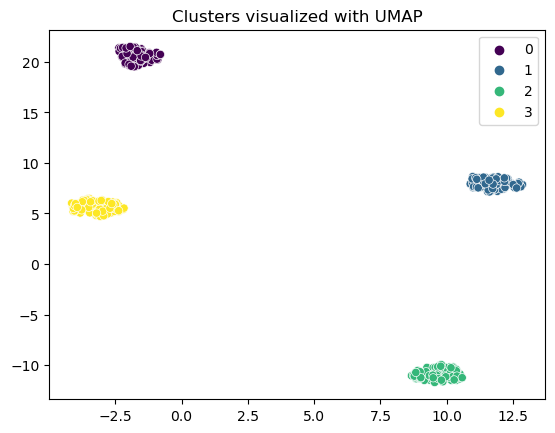

In [16]:
# Generate a high-dimensional synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = np.hstack([X, np.random.randn(X.shape[0], 7)])  # Add 7 random dimensions

# List of dimensionality reduction methods
methods = [
    PCA(n_components=2),
    TSNE(n_components=2),
    LDA(n_components=2),
    umap.UMAP(n_components=2, random_state=42)
]

# Perform clustering in the high-dimensional space
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X)

# Apply each dimensionality reduction method and visualize the result
for i, method in enumerate(methods):
    X_reduced = method.fit_transform(X, y_true)  # LDA requires the true labels when fitting
    plt.figure(i)
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_pred, palette='viridis')
    plt.title(f'Clusters visualized with {method.__class__.__name__}')
    
plt.show()